In [14]:
import os
import sys
# import spateo as st
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import anndata
import numpy as np
import math
from jupyterthemes import jtplot
# jtplot.style(theme="grade3")
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
adata = anndata.read('../data/SCT_h5ad/E16-18h_a_SCT_anno.h5ad')
slices = [adata[adata.obs['slice_ID']==sliceID] for sliceID in adata.obs['slice_ID'].cat.categories]
for i in range(len(slices)):slices[i].obsm['spatial'] = slices[i].obsm['spatial'].to_numpy()[:,0:2]

In [16]:
basn_slices = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    mode="SN",
    select_high_exp_genes=False,
    normalize_c=True,
    normalize_g=True,
    max_iter=100,
    device="cpu",
    lambdaVF = 5,
    beta = 0.05,
    beta2=0.5
)

|-----> [Models alignment based on morpho] in progress: 7.6923%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 15.3846%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 23.0769%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 30.7692%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 38.4615%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 46.1538%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 53.8462%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment ba

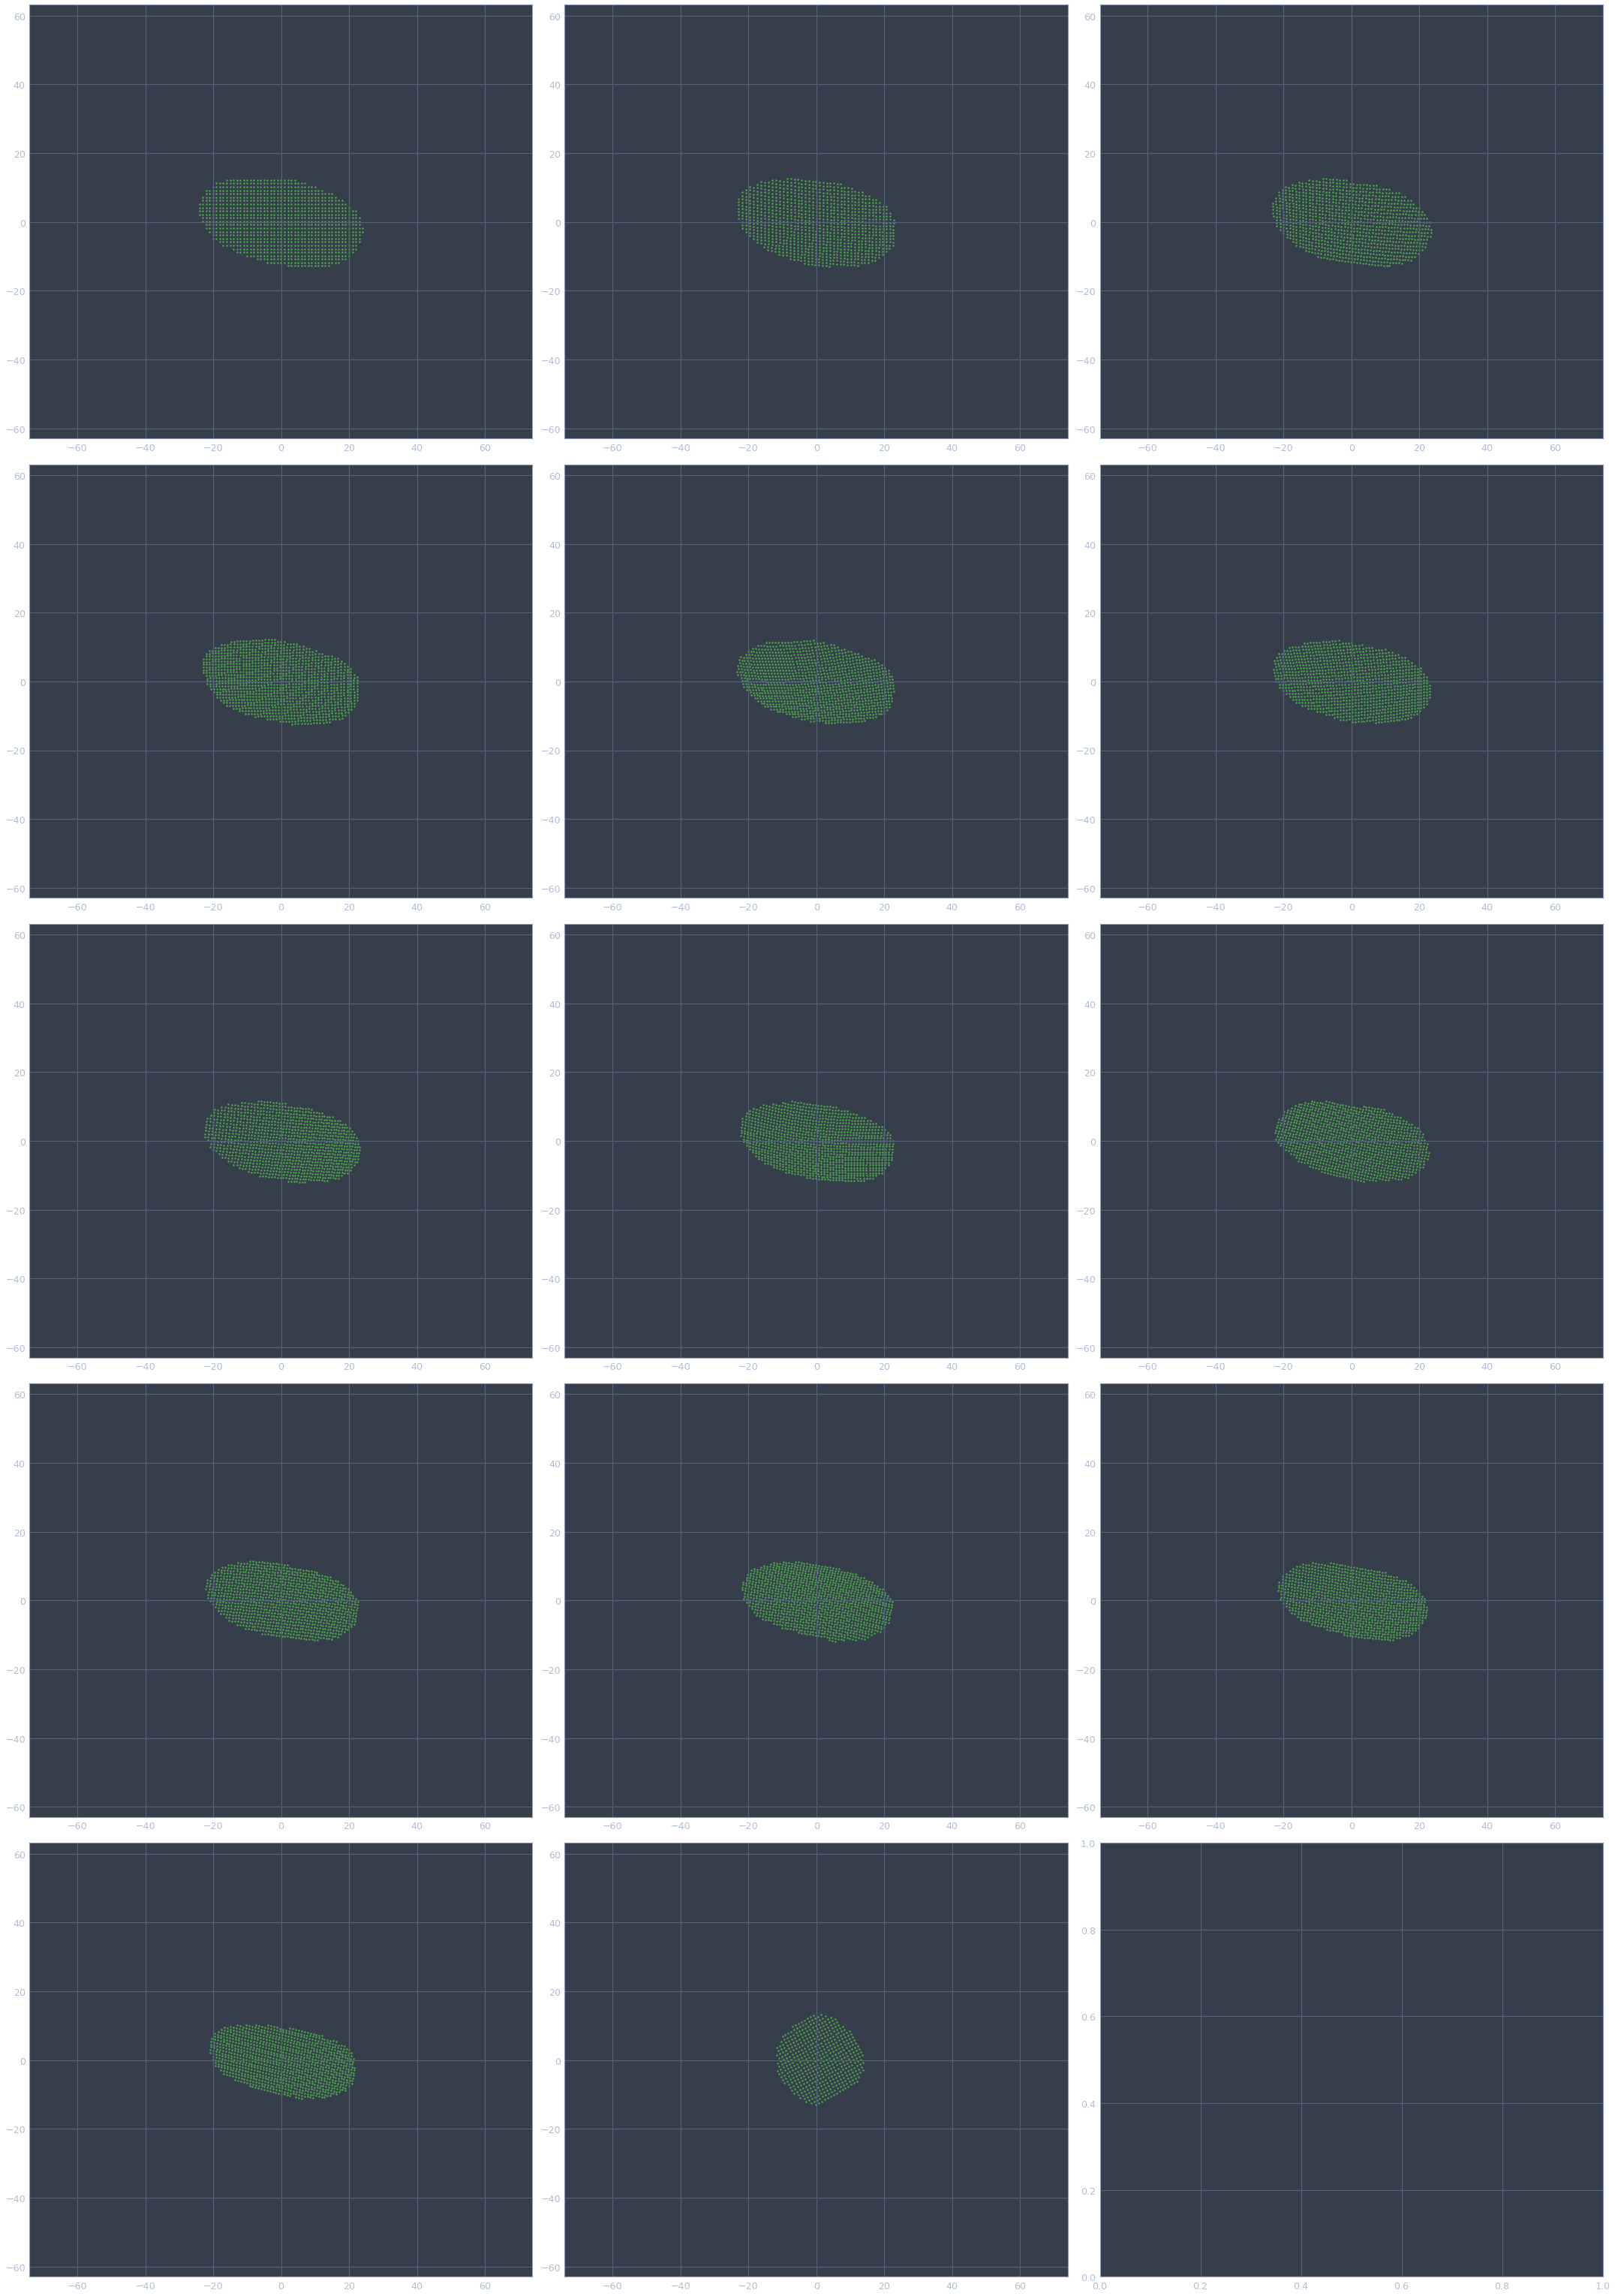

In [17]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin,xmax = -100,800
ymin,ymax = -100,300
%matplotlib inline
lines = math.ceil((len(basn_slices)) / 3)
xmin = np.min([np.min(basn_slices[index].obsm['align_spatial'][:,0]) for index in range(len(basn_slices))])
xmax = np.max([np.max(basn_slices[index].obsm['align_spatial'][:,0]) for index in range(len(basn_slices))])
ymin = np.min([np.min(basn_slices[index].obsm['align_spatial'][:,1]) for index in range(len(basn_slices))])
ymax = np.max([np.max(basn_slices[index].obsm['align_spatial'][:,1]) for index in range(len(basn_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)

fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(basn_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(basn_slices[index].obsm['align_spatial'][:,0],basn_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
    # axs[line,col].axis('equal')
plt.tight_layout()
plt.show()

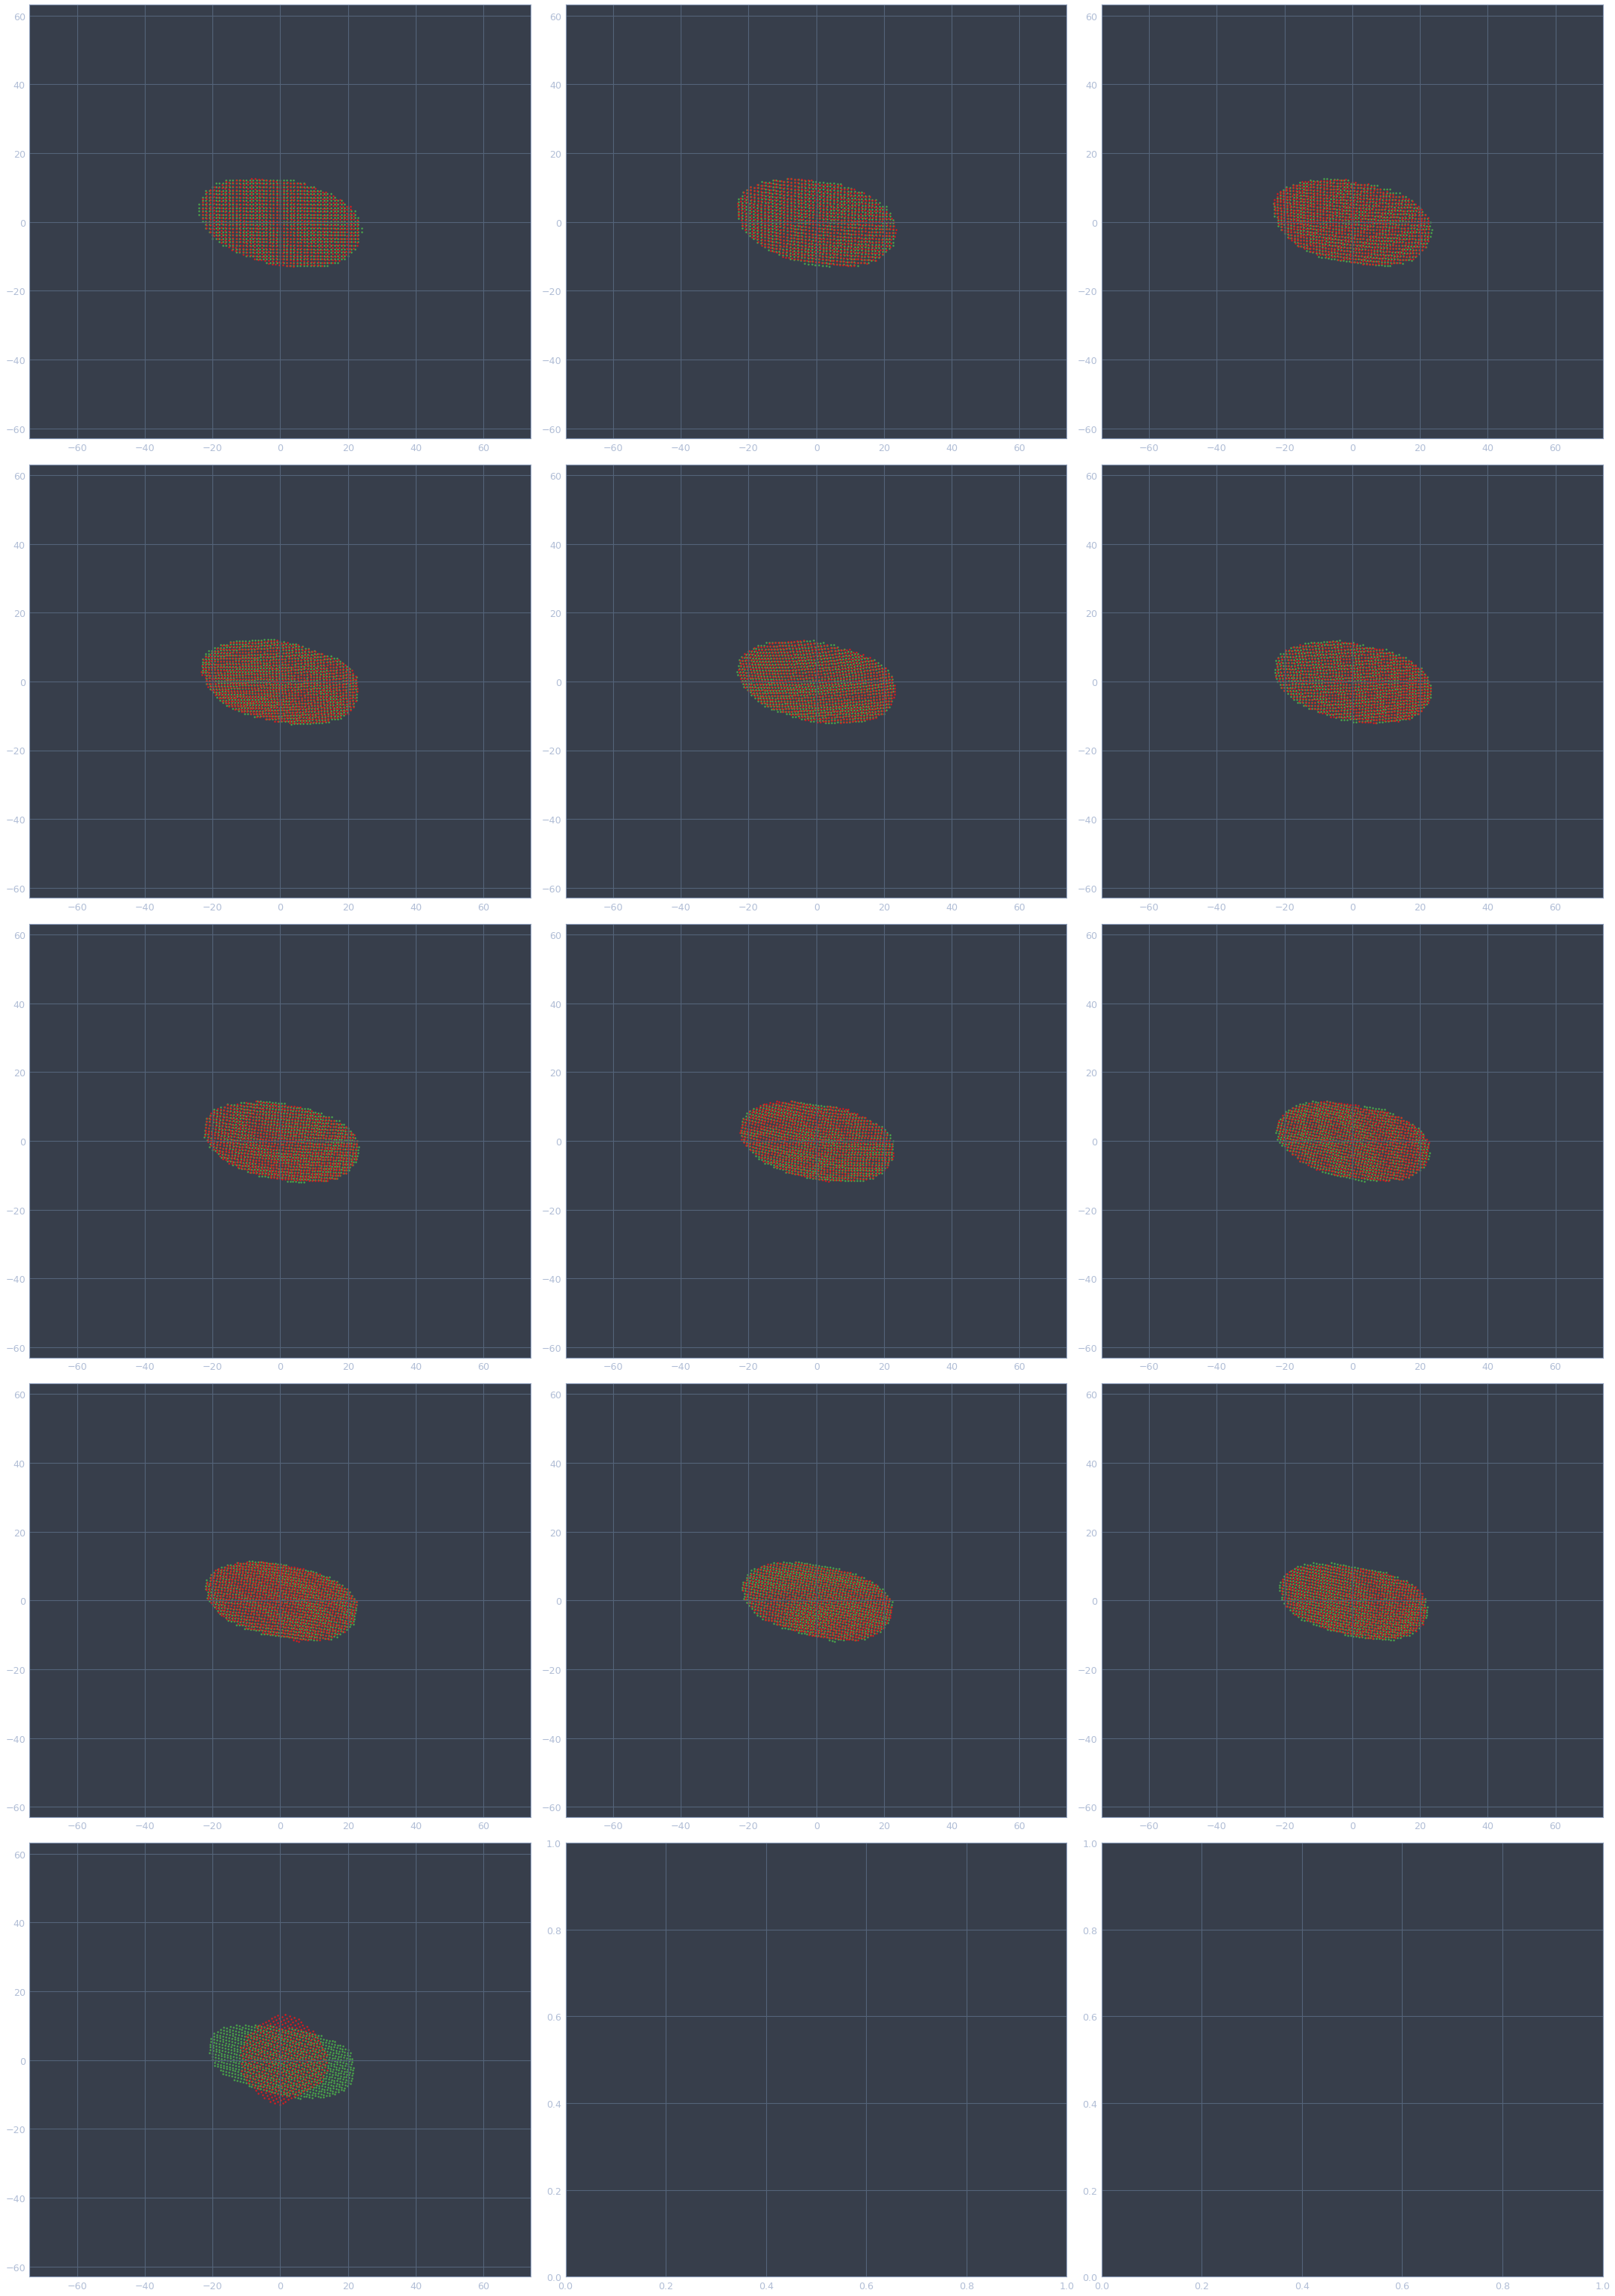

In [18]:
%matplotlib inline
lines = math.ceil((len(basn_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(basn_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(basn_slices[index].obsm['align_spatial'][:,0],basn_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(basn_slices[index+1].obsm['align_spatial'][:,0],basn_slices[index+1].obsm['align_spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

In [19]:
bas_slices = morpho.morpho_align(
    models=[s.copy() for s in slices],
    spatial_key="spatial",
    key_added="align_spatial",
    mode="S",
    select_high_exp_genes=False,
    normalize_c=True,
    normalize_g=True,
    max_iter=100,
    device="cpu",
    beta2=0.5
)

|-----> [Models alignment based on morpho] in progress: 7.6923%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 15.3846%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 23.0769%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 30.7692%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 38.4615%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 46.1538%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment based on morpho] in progress: 53.8462%|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> [Models alignment ba

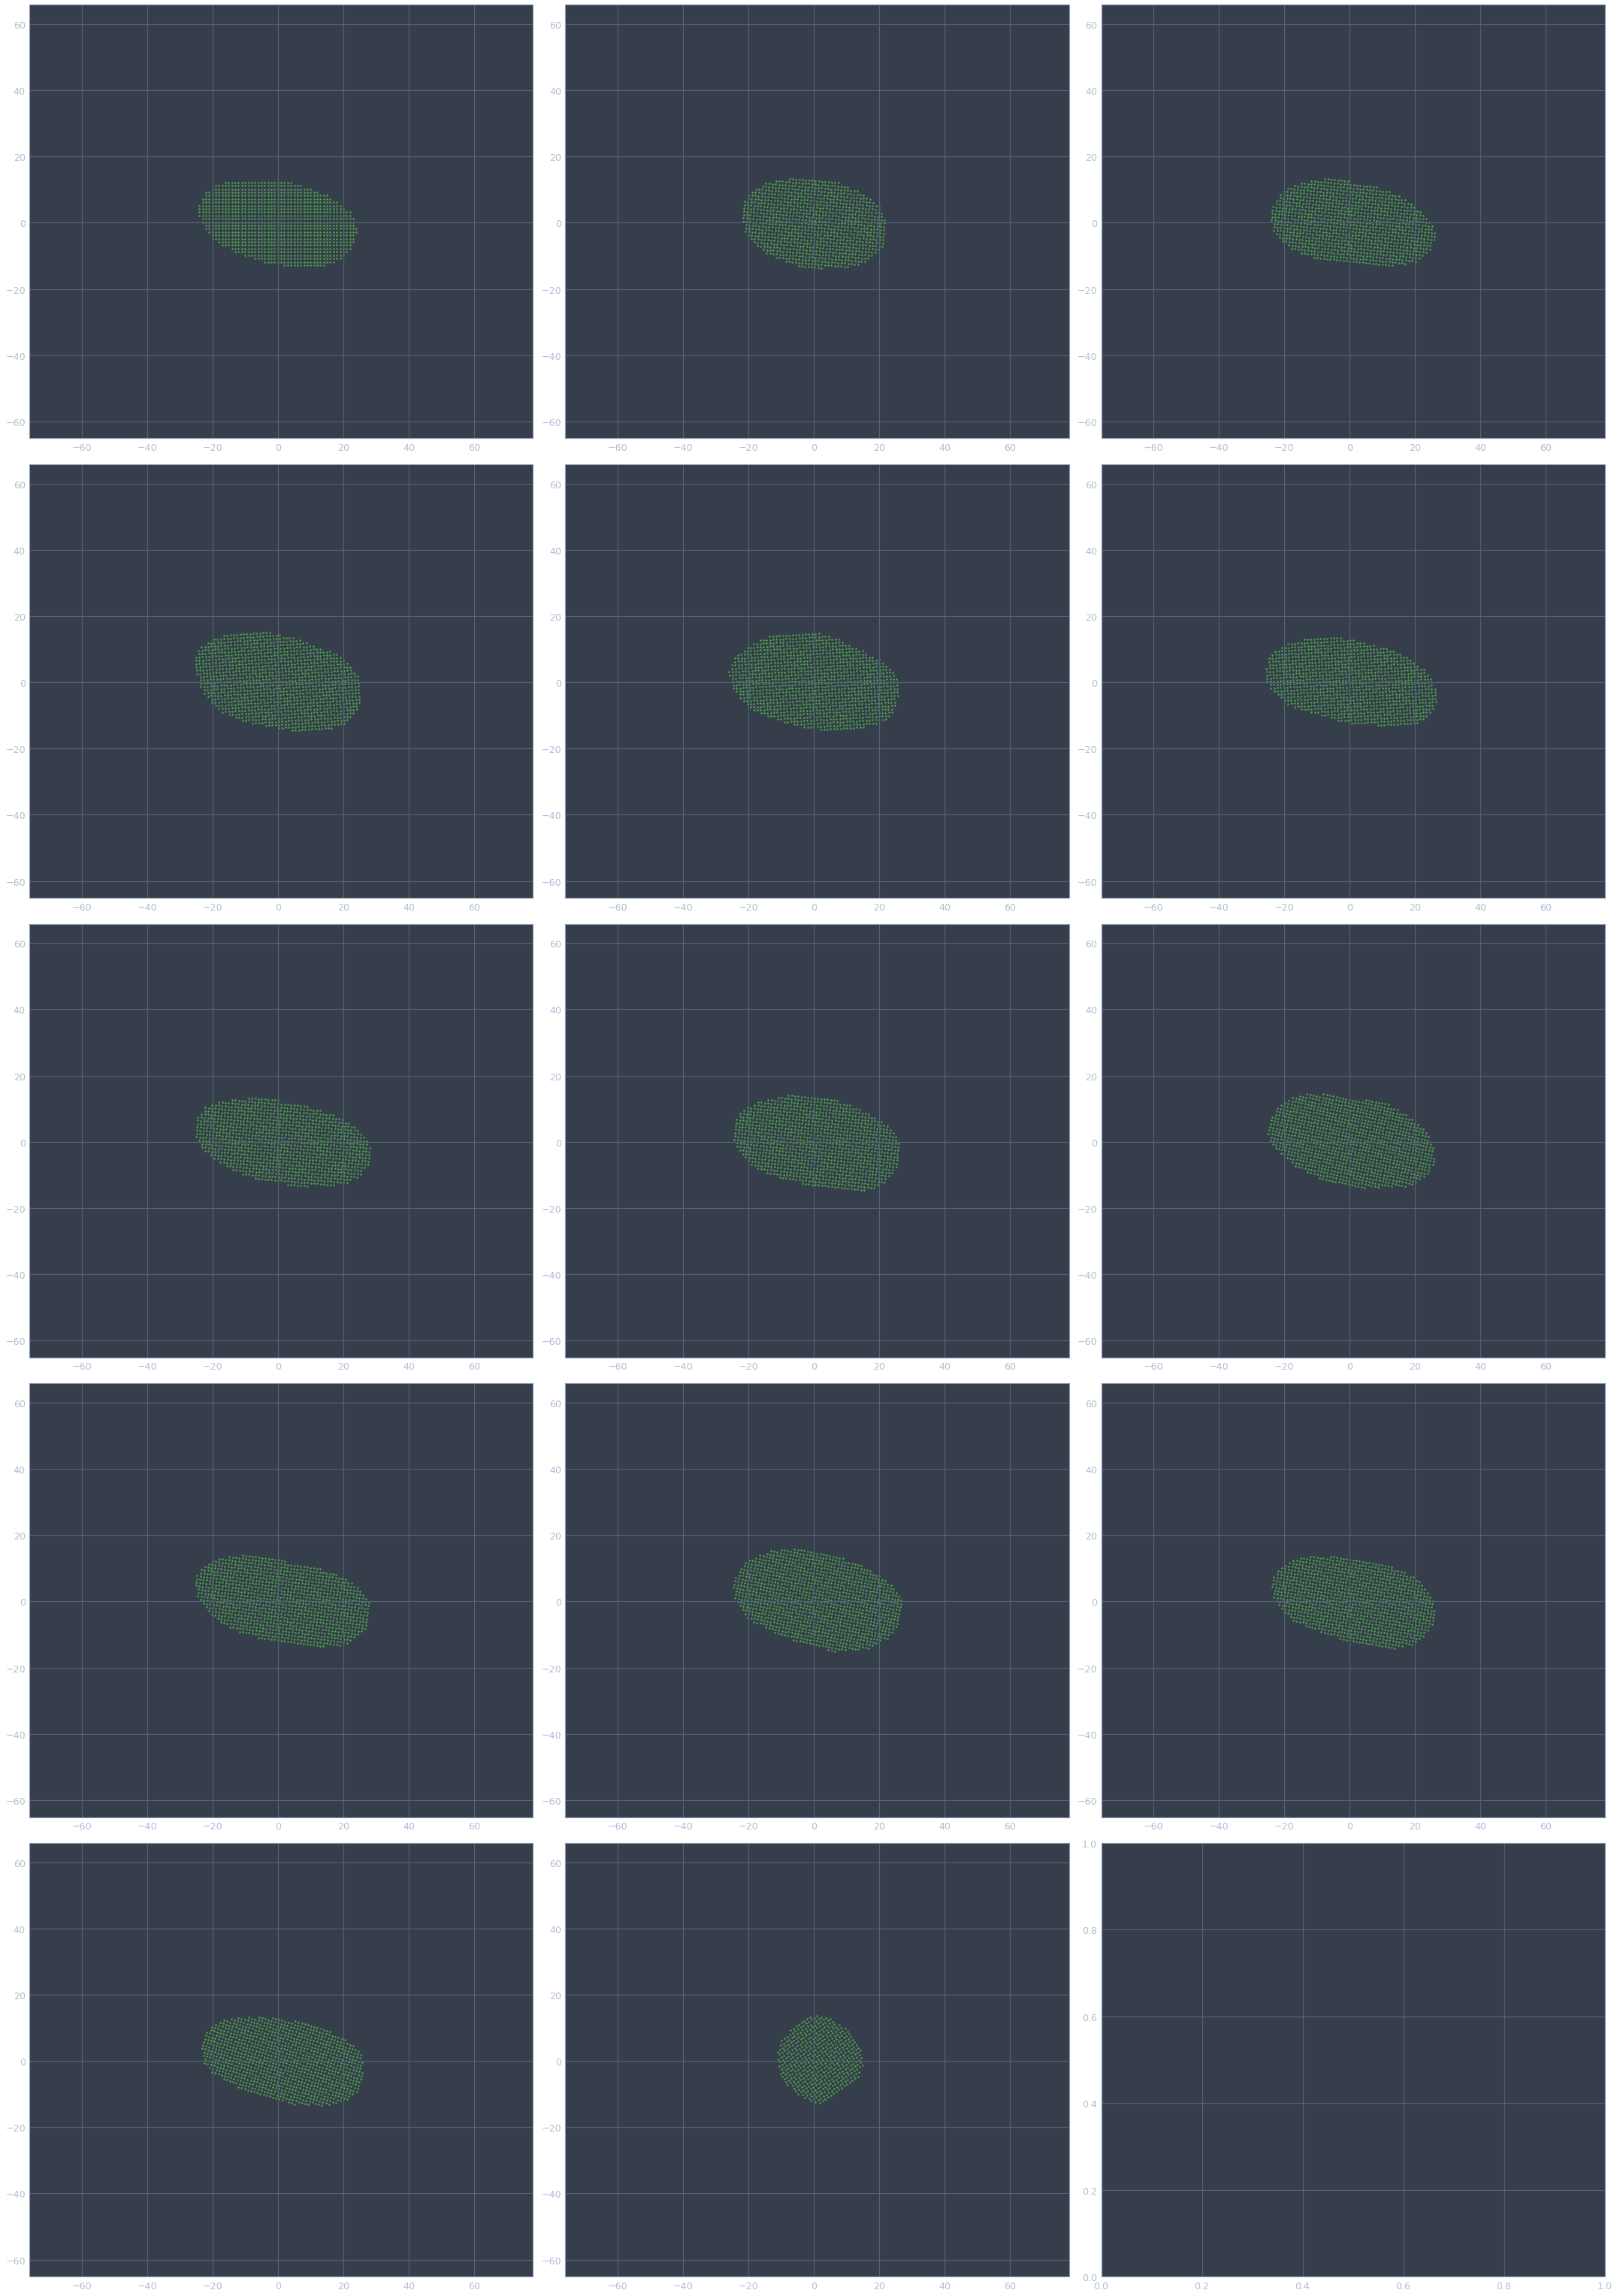

In [20]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin,xmax = -100,800
ymin,ymax = -100,300
%matplotlib inline
lines = math.ceil((len(bas_slices)) / 3)
xmin = np.min([np.min(bas_slices[index].obsm['align_spatial'][:,0]) for index in range(len(bas_slices))])
xmax = np.max([np.max(bas_slices[index].obsm['align_spatial'][:,0]) for index in range(len(bas_slices))])
ymin = np.min([np.min(bas_slices[index].obsm['align_spatial'][:,1]) for index in range(len(bas_slices))])
ymax = np.max([np.max(bas_slices[index].obsm['align_spatial'][:,1]) for index in range(len(bas_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)

fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(bas_slices[index].obsm['align_spatial'][:,0],bas_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
    # axs[line,col].axis('equal')
plt.tight_layout()
plt.show()

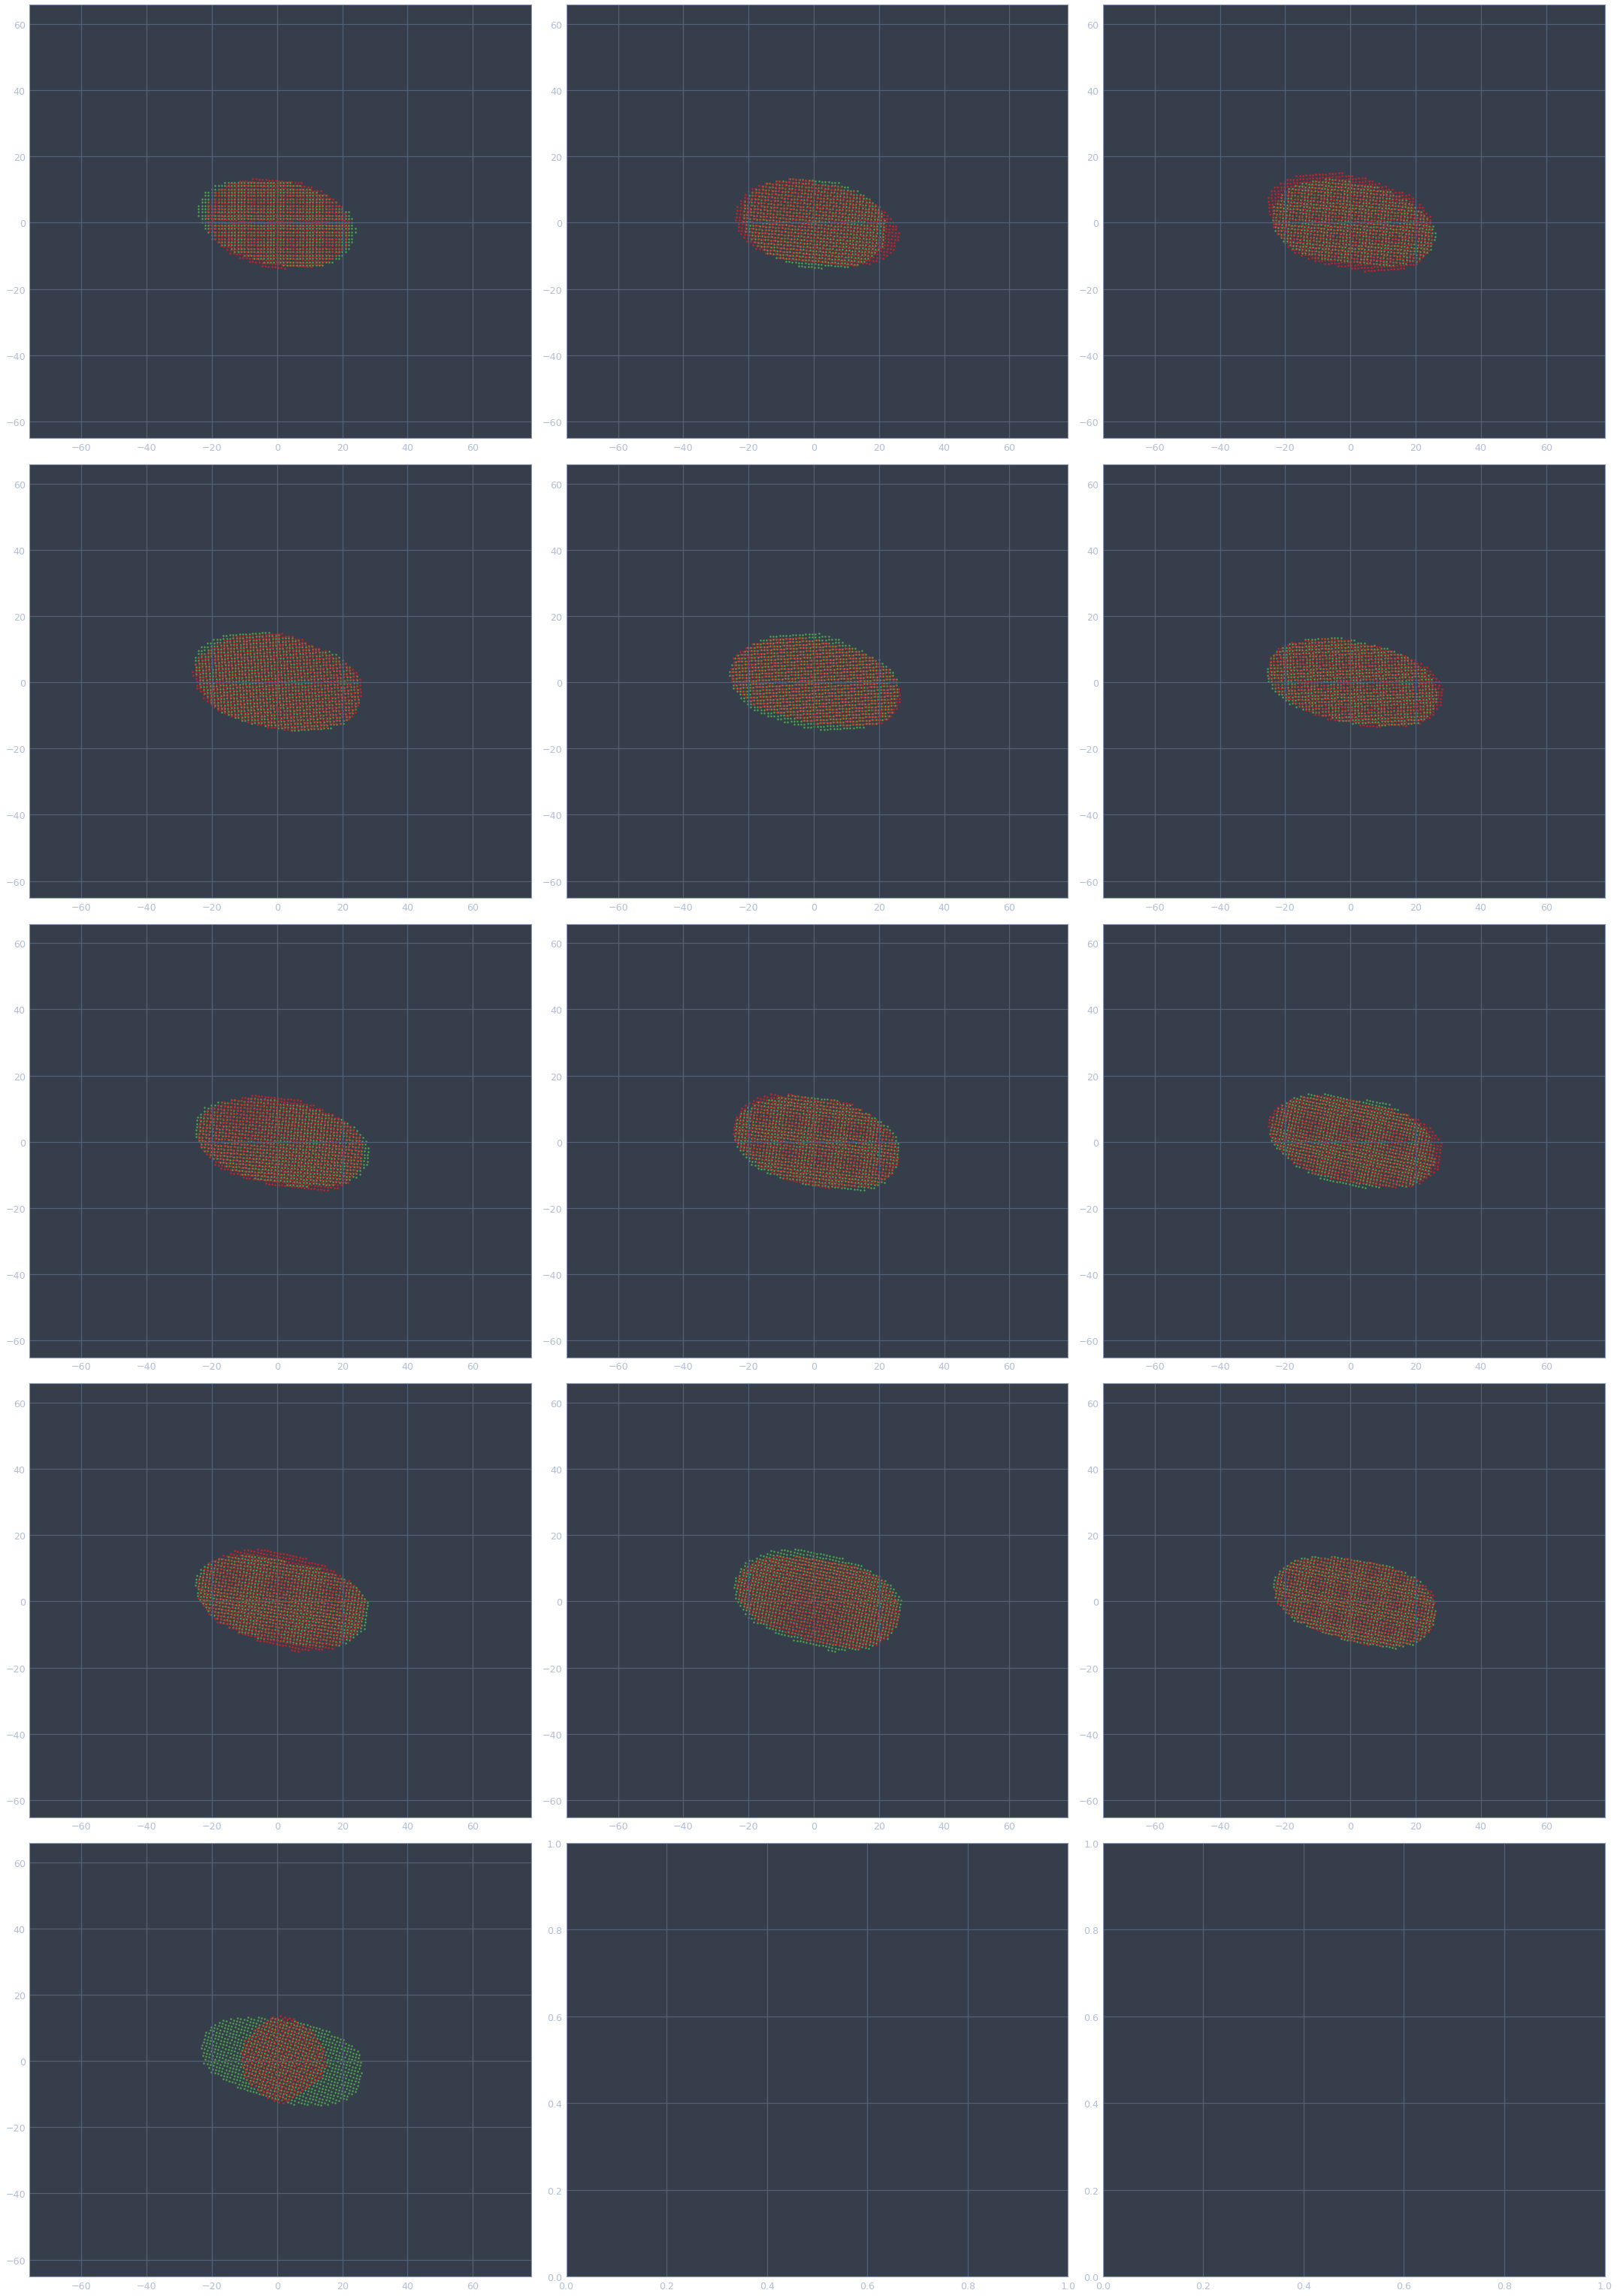

In [21]:
%matplotlib inline
lines = math.ceil((len(bas_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(bas_slices[index].obsm['align_spatial'][:,0],bas_slices[index].obsm['align_spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(bas_slices[index+1].obsm['align_spatial'][:,0],bas_slices[index+1].obsm['align_spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

In [22]:
import paste as pst
import os
import ot
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
pis = []
for i in range(len(slices)-1):
    pi = pst.pairwise_align(slices[i], slices[i+1])
    pis.append(pi)
new_slices = pst.stack_slices_pairwise(slices, pis)

Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.
Using selected backend cpu. If you want to use gpu, set use_gpu = True.


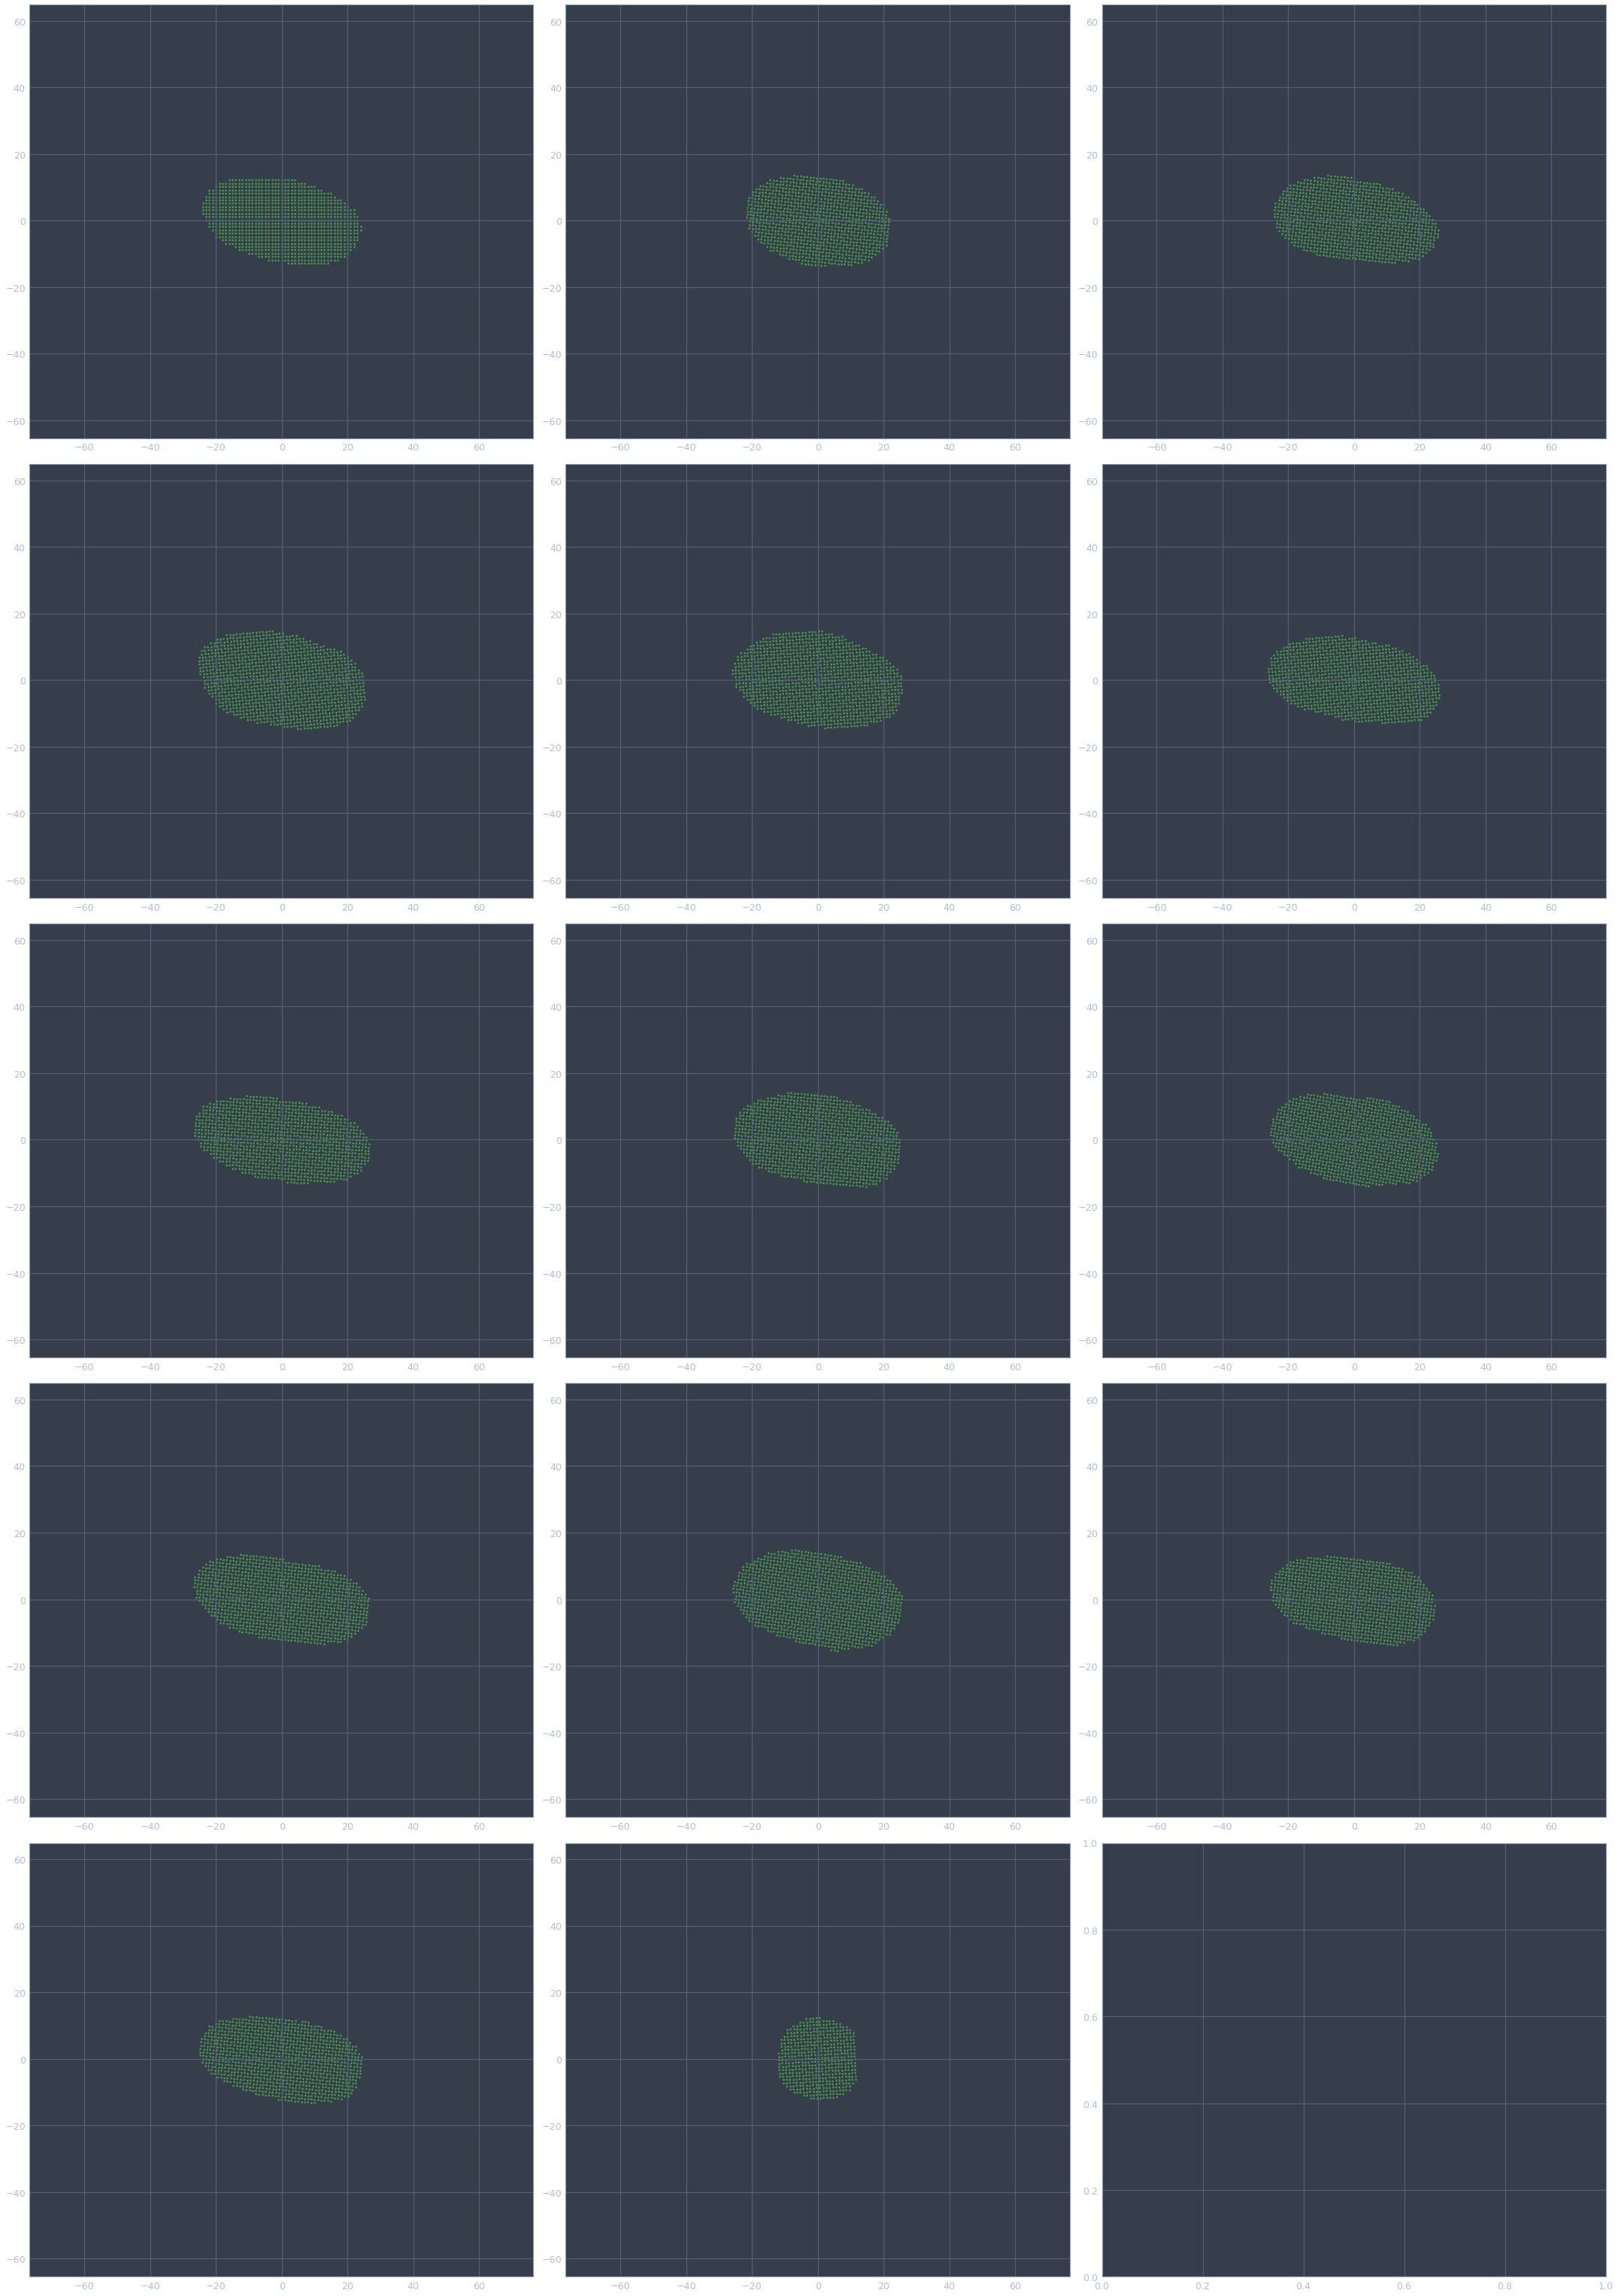

In [23]:
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
xmin = np.min([np.min(new_slices[index].obsm['spatial'][:,0]) for index in range(len(bas_slices))])
xmax = np.max([np.max(new_slices[index].obsm['spatial'][:,0]) for index in range(len(bas_slices))])
ymin = np.min([np.min(new_slices[index].obsm['spatial'][:,1]) for index in range(len(bas_slices))])
ymax = np.max([np.max(new_slices[index].obsm['spatial'][:,1]) for index in range(len(bas_slices))])
margin = 50
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
%matplotlib inline
lines = math.ceil((len(bas_slices)) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)):
    line = index//3
    col = index - line*3
    axs[line,col].scatter(new_slices[index].obsm['spatial'][:,0],new_slices[index].obsm['spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()

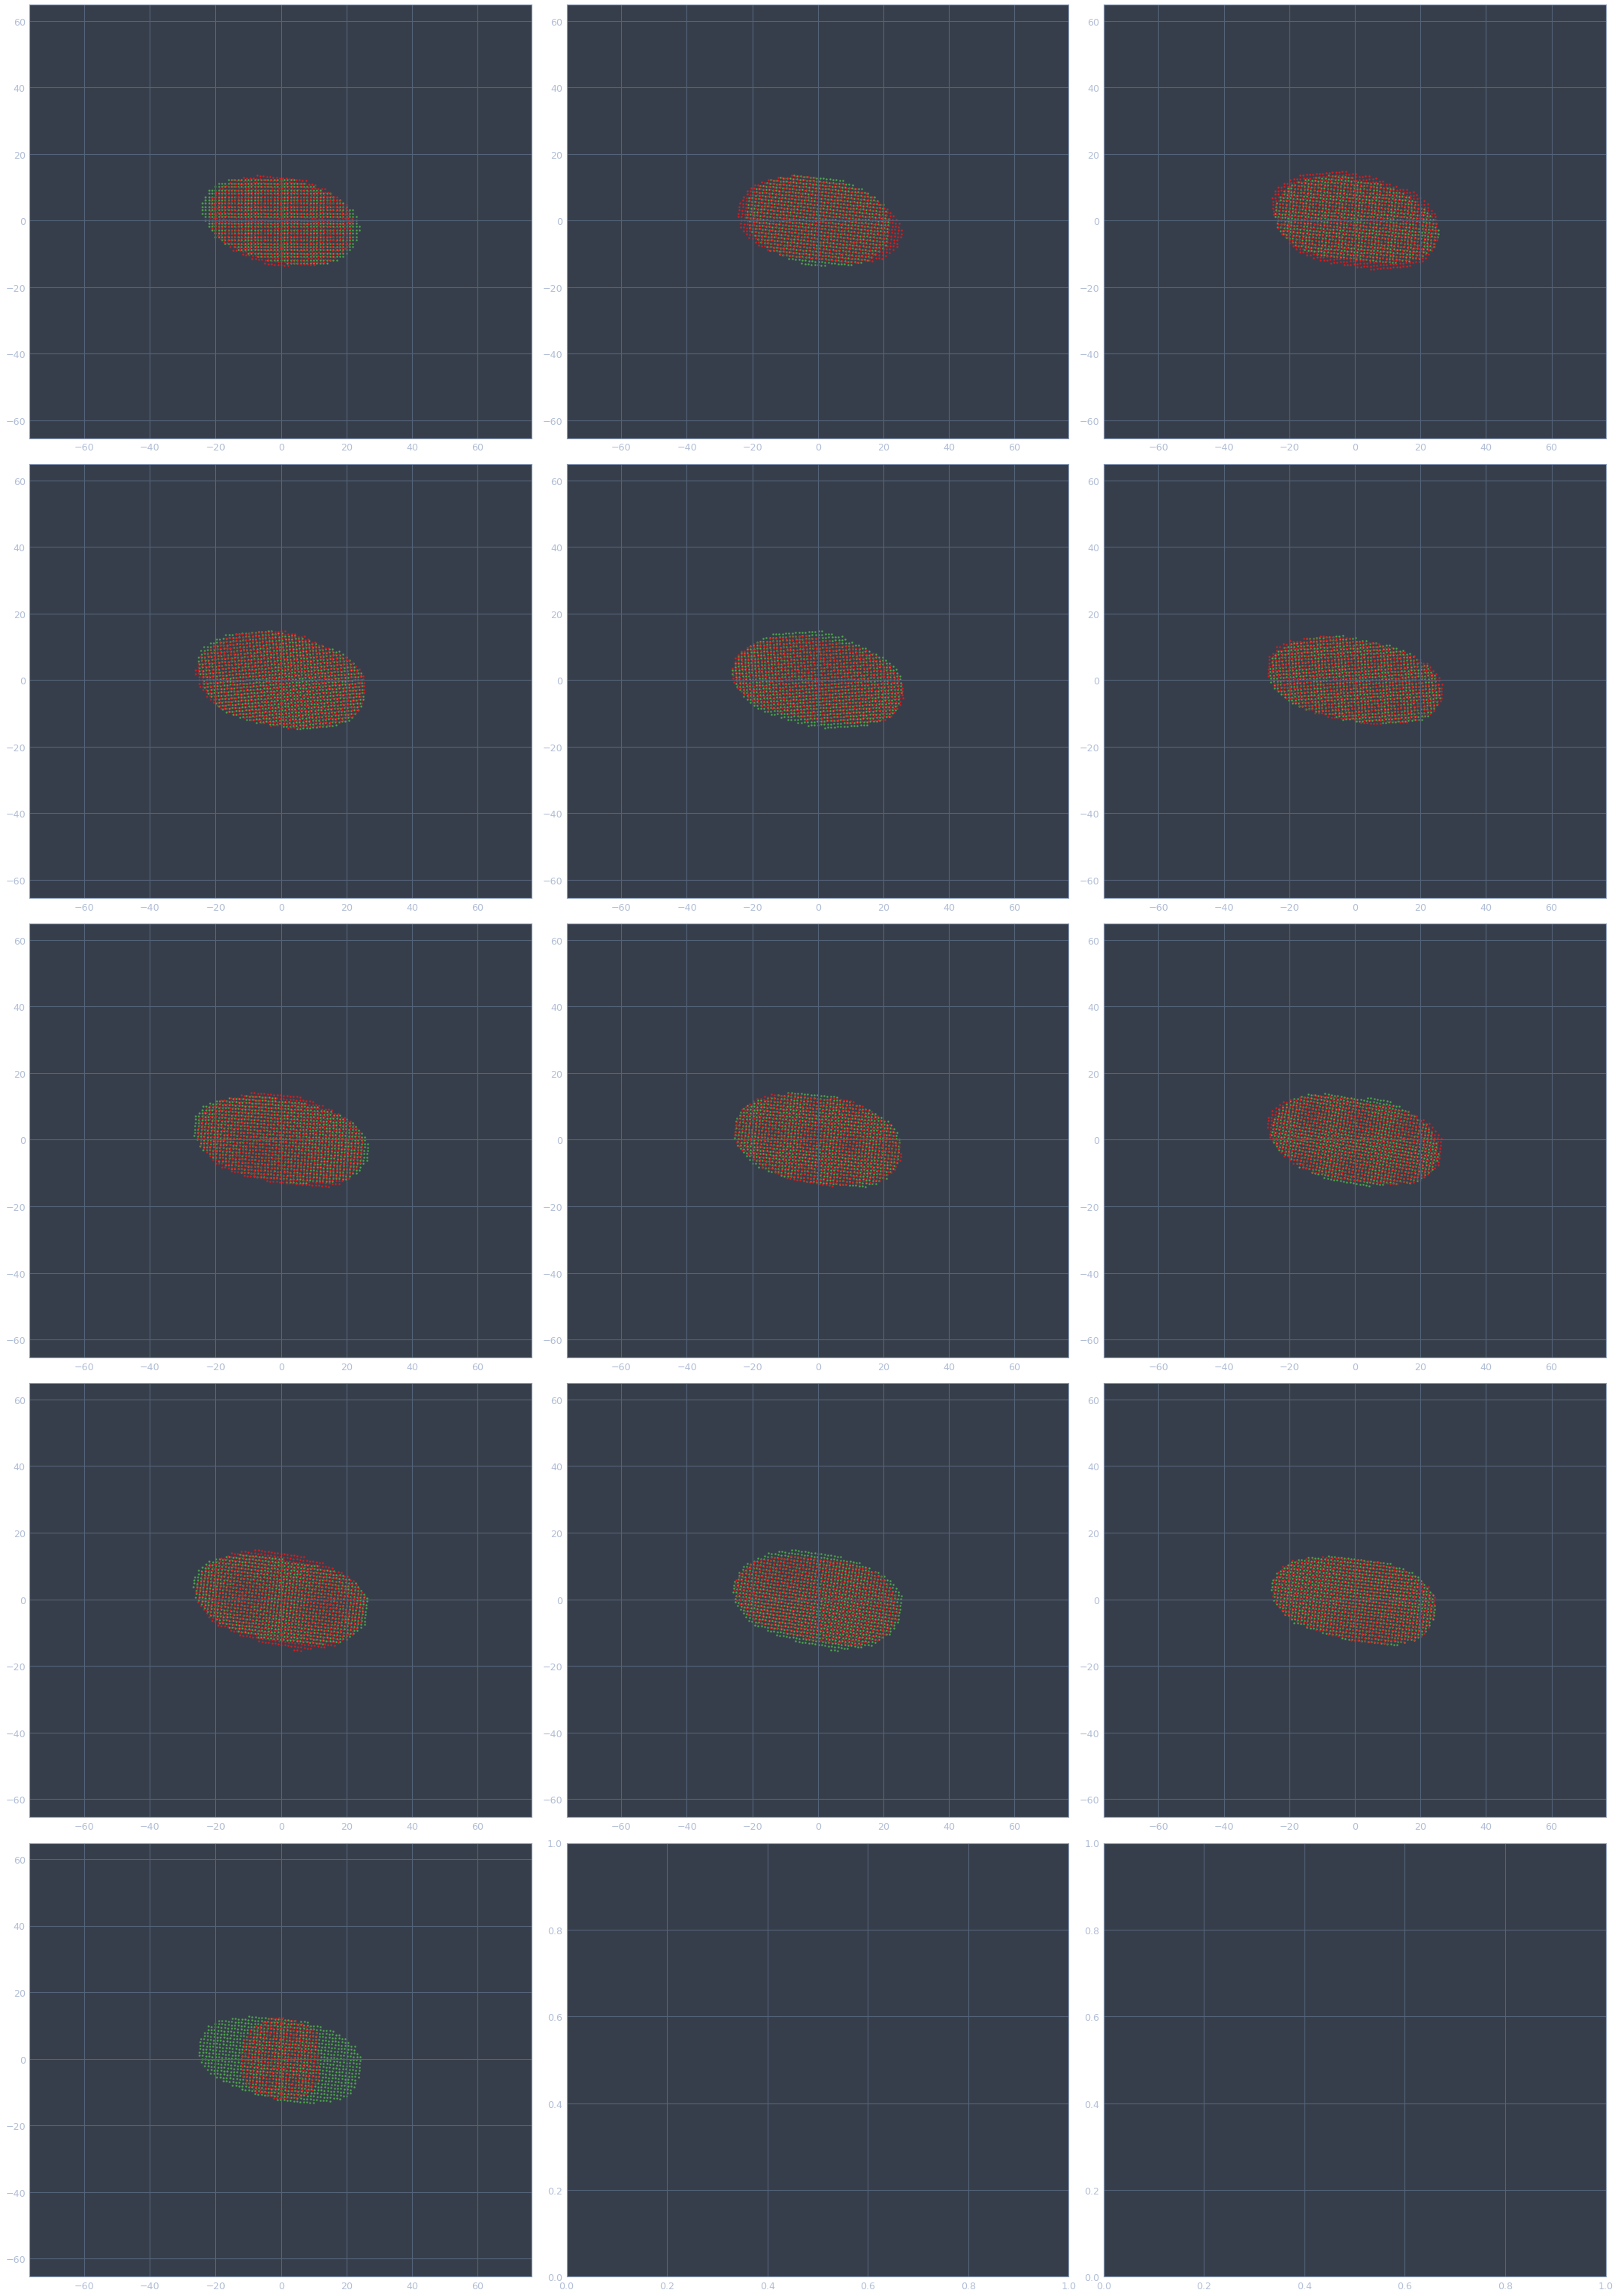

In [24]:
%matplotlib inline
lines = math.ceil((len(bas_slices)-1) / 3)
fig, axs = plt.subplots(lines, 3,figsize=(30,lines*10*scale))
for index in range(len(bas_slices)-1):
    line = index // 3
    col = index - line*3
    axs[line,col].scatter(new_slices[index].obsm['spatial'][:,0],new_slices[index].obsm['spatial'][:,1],s=5,c=slice_colors[2])
    axs[line,col].scatter(new_slices[index+1].obsm['spatial'][:,0],new_slices[index+1].obsm['spatial'][:,1],s=5,c=slice_colors[0])
    axs[line,col].set_xlim([xmin-margin,xmax+margin])
    axs[line,col].set_ylim([ymin-margin,ymax+margin])
plt.tight_layout()
plt.show()